   #   Analyse par DEVICES du TSD Dimitri HAMON - DOTO

In [78]:
#pip install gspread
import pandas as pd
import matplotlib.pyplot as plt
import gspread
import seaborn as sns
import pptx
from pptx import Presentation
from pptx.util import Inches

# Extraction des données de l'utilisateur

In [79]:
# Authentification avec Google Drive API
gc = gspread.service_account(filename='organic-bivouac-381907-a6cf5969e492.json')

# Ouvrir le fichier Google Sheet
wks = gc.open_by_url("https://docs.google.com/spreadsheets/d/1DNaUDzrKQlV8fYGMhsDyQBFSqSetLZyKcksjAWmK0_U")

# Créer une liste pour stocker les dataframes
df_list = []

# Boucler à travers chaque feuille de calcul du fichier Google Sheet
for sheet in wks.worksheets():
    # Récupérer les valeurs de la feuille de calcul
    values = sheet.get_all_values(value_render_option='FORMATTED_VALUE')
    # Transformer les valeurs en dataframe
    df = pd.DataFrame(values[1:], columns=values[0])
    # Remplacer les virgules par des points dans les colonnes numériques
    df = df.replace(',', '.', regex=True)
    # Convertir les colonnes numériques en type float
    df[['temps total\n(secondes)', 'ME', 'CUSTOM\nAPPS', 'PUSH KEY', 'STRUCTURES', 'VIEWS', 'AUTOMATISMS', 'USERS']] = df[['temps total\n(secondes)', 'ME', 'CUSTOM\nAPPS', 'PUSH KEY', 'STRUCTURES', 'VIEWS', 'AUTOMATISMS', 'USERS']].astype(float)
    # Extraire la date à partir de la colonne 'date'
    df['date'] = pd.to_datetime(df['date'].str.split('T').str[0], format='%Y-%m-%d')
    # Ajouter le dataframe à la liste
    df_list.append(df)

### Selection du USER Test

In [80]:
# Afficher l'onglet TSD Dimitri HAMON - DOTO
df_list[7]

,id,date,temps total\n(secondes),ME,CUSTOM\nAPPS,PUSH KEY,STRUCTURES,VIEWS,AUTOMATISMS,USERS,LISTS,UPLOAD,ASSIGNED,BROADCAST,MISSING\nLIST ITEMS,MAP LAYERS,RESOURCES,COMPUTATIONS,device
0,6dfd5d082f914937b8eb1492795d2d95,2023-02-27,150.089193,0.215608,0.248959,0.000169,17.857854,0.000901,0.248654,0.922370,128.4274218,0.01714301109,0.5884439945,0.2567529678,0.5848469734,0.1804130077,0.194988966,0.1106169224,Pixel 3
1,baf53a1666fb40f6b15455b5babd48bd,2023-02-28,166.785901,0.197820,0.473447,0.000256,28.261084,0.000799,0.296770,1.208163,124.6532111,0.0124630928,1.011438131,9.137400866,0.7095589638,0.2472901344,0.1355650425,0.05472207069,Pixel 3
2,61000d6e3b4e48d5a1c68672b902195d,2023-03-01,902.401672,3.270652,0.472721,898.649185,54.784691,0.033829,0.245351,1.026809,837.3786561,0.06340098381,1.264168978,0.2008750439,1.202008963,0.1780598164,0.7710189819,0.4098439217,SM-T395
3,0b5673c0fde04008aaaf75b90198539e,2023-03-01,555.575941,0.277584,0.276359,555.016685,32.131203,0.022179,0.224674,1.209083,505.886322,0.08541417122,1.052367926,11.858289,1.10353303,0.1863701344,0.6363070011,0.3091900349,SM-T395
4,799bb362a34f446ca03293e3a2dc75f7,2023-03-01,699.289337,0.389752,0.236286,698.657388,30.504434,0.001075,0.333165,1.313061,662.2779679,0.03914690018,1.117509127,0.500991106,1.099891901,0.2246520519,0.6905710697,0.2551729679,SM-T395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,f45ddc33b7a44ca698ec993d38c31695,2023-04-12,53.296725,0.132657,0.267285,0.000224,46.360176,0.002221,0.213272,1.015242,3.496646881,0.01722097397,0.6777219772,0.2684779167,0.002064943314,0.2080280781,0.2198338509,0.1465818882,sdk_gphone64_x86_64
243,649b9532bdff4b50840356b4a276c442,2023-04-12,54.192825,0.144108,0.257272,0.000217,46.222178,0.000997,0.226857,1.019515,4.417284966,0.0130879879,0.6438660622,0.3714778423,0.002765893936,0.1718699932,0.2452440262,0.1697909832,sdk_gphone64_x86_64
244,d72cf7e337314bf3a26dc6e65873f012,2023-04-12,53.211698,0.135797,0.281493,0.000210,45.513164,0.001373,0.232365,1.043925,4.135491133,0.01894187927,0.6175148487,0.2657108307,0.002762079239,0.2061059475,0.2455439568,0.1708009243,sdk_gphone64_x86_64
245,23a531a2a3594635b9d113ed1f9fa3f3,2023-04-12,53.361195,0.158010,0.183755,0.000177,46.758960,0.001807,0.276668,0.779407,3.519184113,0.01706409454,0.5501189232,0.2613871098,0.005627155304,0.1709420681,0.2441220284,0.1902661324,sdk_gphone64_x86_64


In [81]:

# Parcourir tous les dataframes de la liste
for i in range(len( df_list)):
    # Renommer la colonne 'temps total\n(secondes)' en 'secondes'
     df_list[i] =  df_list[i].rename(columns={'temps total\n(secondes)': 'secondes'})


In [82]:

data=df_list[7]

# Filtrer les données pour garder uniquement celles à partir du 08/03/2023
data = data.loc[data['date'] >= '2023-02-27']

# Formater la colonne 'date'
data['date'] = pd.to_datetime(data['date']).dt.strftime('%Y-%m-%d')


# Pearson correlation Heatmap

C:\Users\christopher.ongolo\AppData\Local\Temp\ipykernel_9460\3213210753.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:, 'UPLOAD'] = data['UPLOAD'].astype(float)
C:\Users\christopher.ongolo\AppData\Local\Temp\ipykernel_9460\3213210753.py:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:, 'ASSIGNED'] = data['ASSIGNED'].astype(float)
C:\Users\christopher.ongolo\AppData\Local\Temp\ipykernel_9460\3213210753.py:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace i

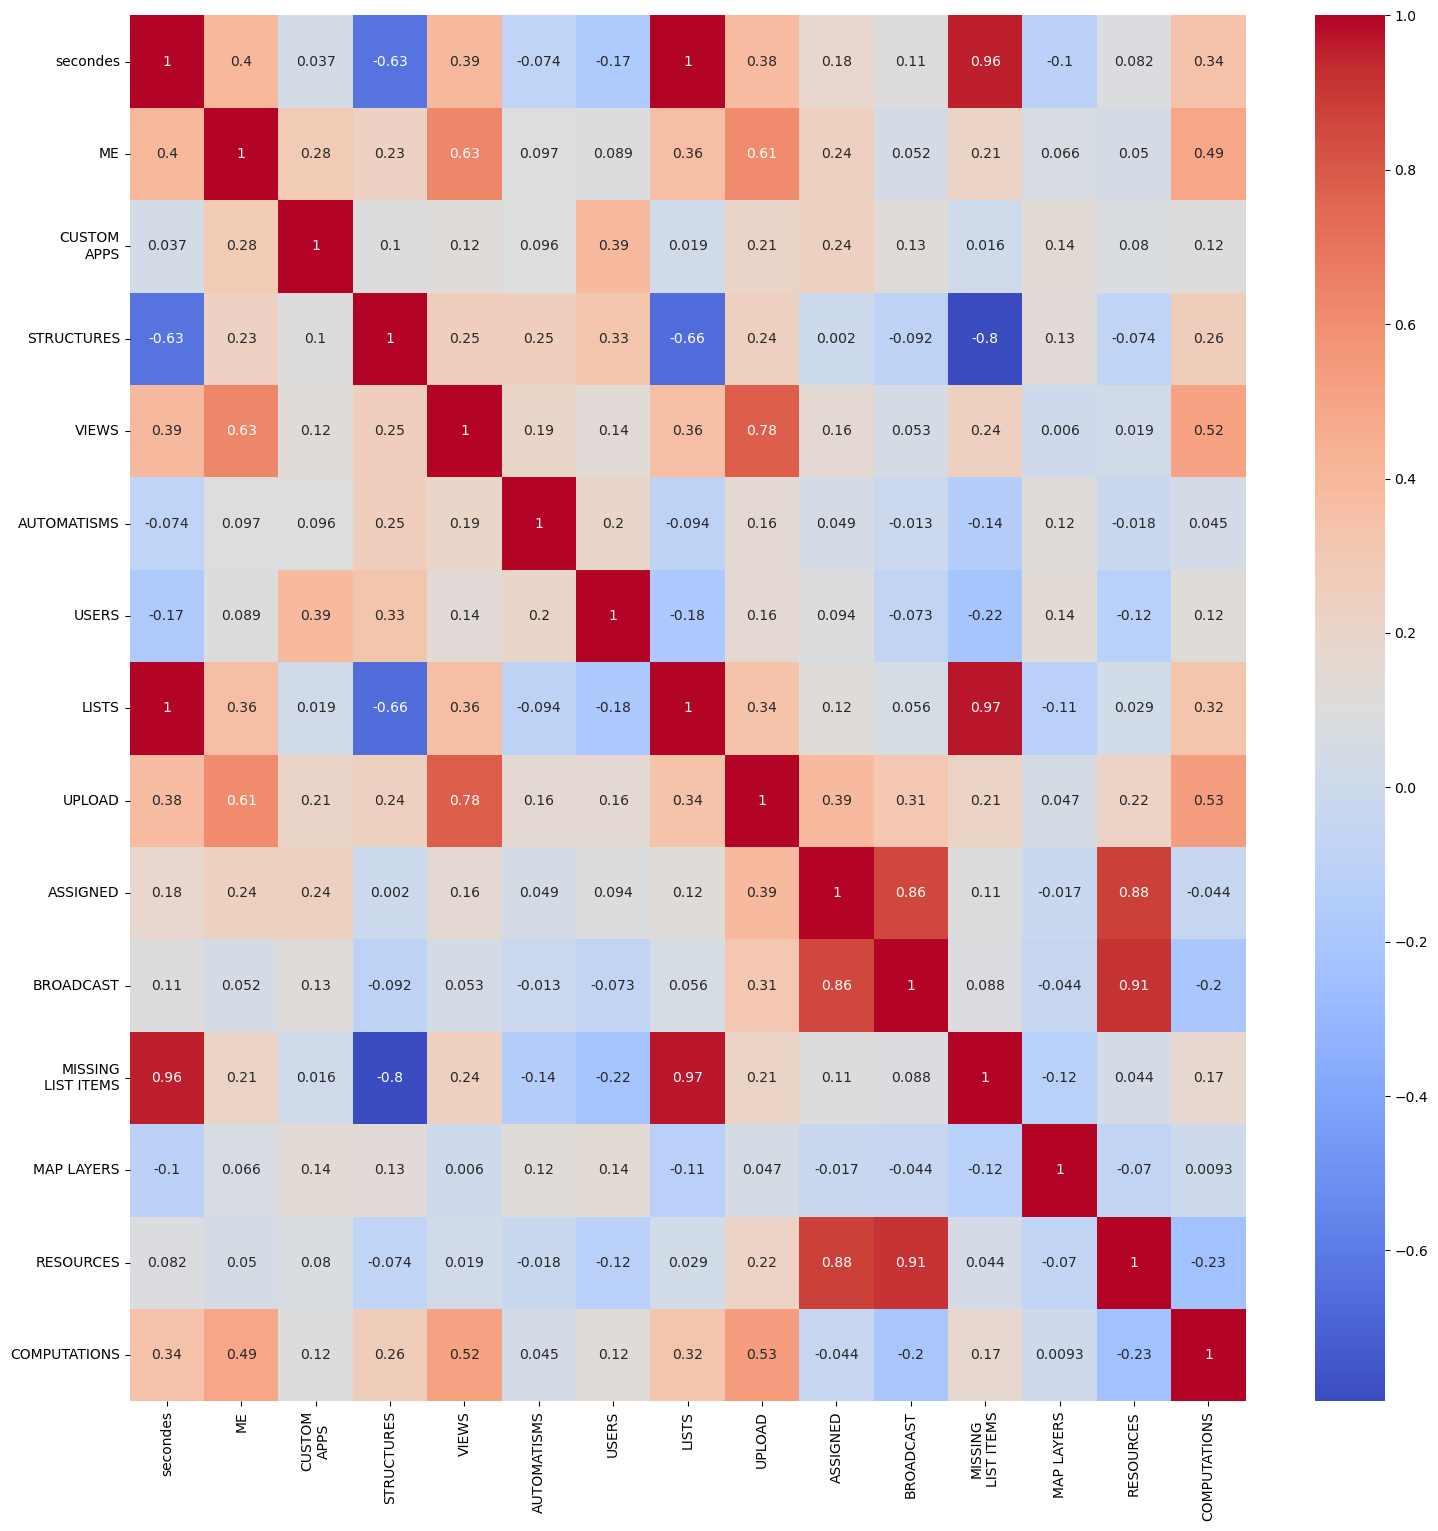

In [83]:
#Transformation du type des colonnes en float64

data.loc[:, 'UPLOAD'] = data['UPLOAD'].astype(float)
data.loc[:, 'ASSIGNED'] = data['ASSIGNED'].astype(float)
data.loc[:, 'MISSING\nLIST ITEMS'] = data['MISSING\nLIST ITEMS'].astype(float)
data.loc[:, 'BROADCAST'] = data['BROADCAST'].astype(float)
data.loc[:, 'MAP LAYERS'] = data['MAP LAYERS'].astype(float)
data.loc[:, 'RESOURCES'] = data['RESOURCES'].astype(float)
data.loc[:, 'COMPUTATIONS'] = data['COMPUTATIONS'].astype(float)
data.loc[:, 'PUSH KEY'] = data['PUSH KEY'].astype(object)
data.loc[:, 'LISTS'] = data['LISTS'].astype(float)

# Calculer la matrice de corrélation avec la méthode de Pearson
corr_matrix = data.corr(method='pearson')

#Créer la figure avec des dimensions personnalisées
fig, ax = plt.subplots(figsize=(18, 18))

# Créer la heatmap à partir de la matrice de corrélation
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, ax=ax)

# Enregistrer la figure sous forme d'image
fig.savefig('corr_matrix.png', dpi=400,bbox_inches='tight')

# Créer la présentation PowerPoint
prs = Presentation()

# Ajouter une diapositive
#slide_layout = prs.slide_layouts[6] # Choisissez le layout de votre diapositive
#slide = prs.slides.add_slide(slide_layout) # Ajoutez la diapositive

slide_layout = prs.slide_layouts[5] # Layout pour un titre et un graphique
slide = prs.slides.add_slide(slide_layout)

# Ajouter le titre de la diapositive
title = slide.shapes.title
title.text = "Patrimoine Users - Dimitri HAMON - DOTO"
# Ajouter l'image de votre graphique à la diapositive
slide.shapes.add_picture('corr_matrix.png', left=Inches(1), top=Inches(2), height=Inches(5),width = Inches(8))

import os
os.remove('corr_matrix.png')
# Enregistrer la présentation PowerPoint
prs.save('presentation.pptx')


### Selection des résultats du Telephone de test(DSK) de DAXIUM

In [84]:
# Sélectionner les données dont la colonne 'device' commence par 'sdk'
sdk_data = data[data['device'].str.startswith('sdk')]
sdk_data

,id,date,secondes,ME,CUSTOM\nAPPS,PUSH KEY,STRUCTURES,VIEWS,AUTOMATISMS,USERS,LISTS,UPLOAD,ASSIGNED,BROADCAST,MISSING\nLIST ITEMS,MAP LAYERS,RESOURCES,COMPUTATIONS,device
8,b39baf980e5d4c94a6c5f71158d158fa,2023-03-16,299.814851,0.182107,0.200119,0.00028,31.885967,0.000958,0.239647,0.671855,264.580832,0.011515,0.464936,0.214828,0.616038,0.137610,0.316967,0.121612,sdk_gphone64_x86_64
9,522e17461add45fbb45b07efd2a21519,2023-03-17,295.094706,0.163529,0.284878,0.000237,29.865494,0.001465,0.193606,0.660144,261.999279,0.008510,0.361316,0.158455,0.677751,0.100888,0.313427,0.150429,sdk_gphone64_x86_64
10,4d1c9f747d93437cbe4195d7fff64fb8,2023-03-17,294.397040,0.141934,0.182174,0.000449,30.661534,0.000978,0.227829,1.101407,259.896488,0.011050,0.515334,0.218677,0.613919,0.173881,0.249755,0.148037,sdk_gphone64_x86_64
11,acd657b7eca644099b5013114946de8e,2023-03-17,294.123019,0.126052,0.223405,0.000249,30.213265,0.000970,0.194686,0.949185,260.155701,0.012924,0.468265,0.218084,0.741347,0.163831,0.325761,0.111163,sdk_gphone64_x86_64
12,a725c774cbbe44f78e18194172455b9d,2023-03-17,302.485978,0.141672,0.267077,0.000254,32.772623,0.000928,0.453297,0.930187,265.535007,0.015771,0.502998,0.424536,0.606579,0.166248,0.246493,0.144836,sdk_gphone64_x86_64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,f45ddc33b7a44ca698ec993d38c31695,2023-04-12,53.296725,0.132657,0.267285,0.000224,46.360176,0.002221,0.213272,1.015242,3.496647,0.017221,0.677722,0.268478,0.002065,0.208028,0.219834,0.146582,sdk_gphone64_x86_64
243,649b9532bdff4b50840356b4a276c442,2023-04-12,54.192825,0.144108,0.257272,0.000217,46.222178,0.000997,0.226857,1.019515,4.417285,0.013088,0.643866,0.371478,0.002766,0.171870,0.245244,0.169791,sdk_gphone64_x86_64
244,d72cf7e337314bf3a26dc6e65873f012,2023-04-12,53.211698,0.135797,0.281493,0.00021,45.513164,0.001373,0.232365,1.043925,4.135491,0.018942,0.617515,0.265711,0.002762,0.206106,0.245544,0.170801,sdk_gphone64_x86_64
245,23a531a2a3594635b9d113ed1f9fa3f3,2023-04-12,53.361195,0.158010,0.183755,0.000177,46.758960,0.001807,0.276668,0.779407,3.519184,0.017064,0.550119,0.261387,0.005627,0.170942,0.244122,0.190266,sdk_gphone64_x86_64


In [85]:
nb_lignes = len(sdk_data)

### Selection des résultats des telephones(OtherDevices) de SPIE

In [86]:

# Filtrer les lignes où 'device' ne commence pas par 'sdk'
other_data = data[~data['device'].str.startswith('sdk')]
nb_lignes = len(other_data)
print(nb_lignes)

11


### Selection des colonnes du dataset qui nous interesse

In [87]:

# Créer un nouveau DataFrame avec les colonnes 'date' et 'secondes'
df = pd.DataFrame({'date': sdk_data['date'], 'secondes': sdk_data['secondes'],'structures':sdk_data['STRUCTURES'],'lists':sdk_data['LISTS'],'broadcast':sdk_data['BROADCAST'],'ressources':sdk_data['RESOURCES'],'users':sdk_data['USERS']})
odf =  pd.DataFrame({'date': other_data['date'], 'secondes': other_data['secondes'],'structures':other_data['STRUCTURES'],'lists':other_data['LISTS'],'broadcast':other_data['BROADCAST'],'ressources':other_data['RESOURCES'],'users':other_data['USERS']})  


In [88]:
odf

,date,secondes,structures,lists,broadcast,ressources,users
0,2023-02-27,150.089193,17.857854,128.427422,0.256753,0.194989,0.922370
1,2023-02-28,166.785901,28.261084,124.653211,9.137401,0.135565,1.208163
2,2023-03-01,902.401672,54.784691,837.378656,0.200875,0.771019,1.026809
3,2023-03-01,555.575941,32.131203,505.886322,11.858289,0.636307,1.209083
4,2023-03-01,699.289337,30.504434,662.277968,0.500991,0.690571,1.313061
5,2023-03-02,476.615383,35.719065,435.444138,0.442320,0.690802,0.774051
6,2023-03-03,813.128844,61.637925,742.243878,0.240765,1.709878,1.280094
7,2023-03-03,494.794776,30.465234,457.843177,0.335350,0.632822,1.362896
164,2023-04-04,82.127487,41.372736,3.510154,0.410722,0.961595,0.913788
171,2023-04-05,85.760982,44.755417,3.258840,0.381523,0.301642,1.105386


In [89]:
#Transformation du type des colonnes en float64
df['lists'] = df['lists'].astype(float)
df['broadcast'] = df['broadcast'].astype(float)
df['ressources'] = df['ressources'].astype(float)
df['users'] = df['users'].astype(float)
odf['lists'] = odf['lists'].astype(float)
odf['broadcast'] = odf['broadcast'].astype(float)
odf['ressources'] = odf['ressources'].astype(float)
odf['users'] = df['users'].astype(float)

In [90]:
df

,date,secondes,structures,lists,broadcast,ressources,users
8,2023-03-16,299.814851,31.885967,264.580832,0.214828,0.316967,0.671855
9,2023-03-17,295.094706,29.865494,261.999279,0.158455,0.313427,0.660144
10,2023-03-17,294.397040,30.661534,259.896488,0.218677,0.249755,1.101407
11,2023-03-17,294.123019,30.213265,260.155701,0.218084,0.325761,0.949185
12,2023-03-17,302.485978,32.772623,265.535007,0.424536,0.246493,0.930187
...,...,...,...,...,...,...,...
242,2023-04-12,53.296725,46.360176,3.496647,0.268478,0.219834,1.015242
243,2023-04-12,54.192825,46.222178,4.417285,0.371478,0.245244,1.019515
244,2023-04-12,53.211698,45.513164,4.135491,0.265711,0.245544,1.043925
245,2023-04-12,53.361195,46.758960,3.519184,0.261387,0.244122,0.779407


# Répartition du TSD du device SDK

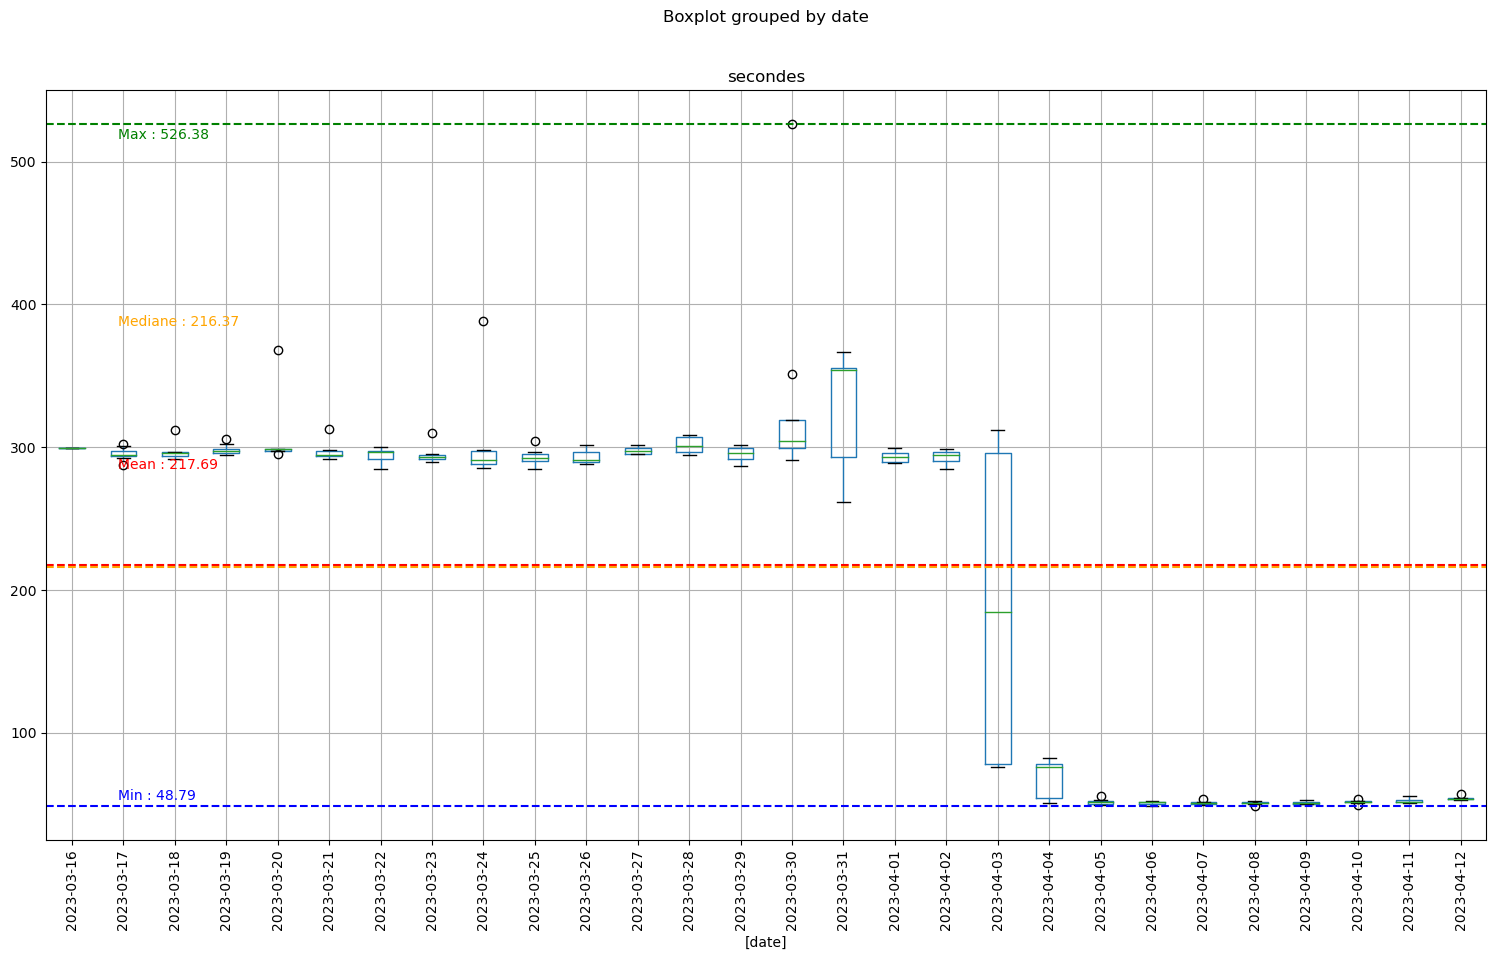

In [91]:
# Créer le graphique avec pandas
fig, ax = plt.subplots(figsize=(18,10))
df.boxplot(column=['secondes'], by=['date'], ax=ax)

# Calculer la moyenne des secondes pour chaque date
mean = df.groupby('date')['secondes'].mean()
median = df.groupby('date')['secondes'].median()
maxi = df['secondes'].max()
mini = df['secondes'].min()

# Ajouter une ligne rouge horizontale pour la moyenne des moyennes
ax.axhline(y=mean.mean(), color='red', linestyle='--', label='Moyenne')
ax.axhline(y=median.mean(), color='orange', linestyle='--', label='Mediane')
ax.axhline(y=maxi, color='green', linestyle='--', label='Max')
ax.axhline(y=mini, color='blue', linestyle='--', label='Min')

# Faire pivoter les étiquettes de l'axe des x
plt.xticks(rotation=90)

# Ajouter les valeurs du minimum et du maximum sur l'axe des y
# Ajouter les valeurs du minimum, maximum et moyenne sur l'axe des y
ax.text(0.05, 0.95, f"Max : {maxi:.2f}", transform=ax.transAxes, va='top', ha='left', color='green')
ax.text(0.05, 0.50, f"Mean : {mean.mean():.2f}", transform=ax.transAxes, va='center', ha='left', color='red')
ax.text(0.05, 0.05, f"Min : {mini:.2f}", transform=ax.transAxes, va='bottom', ha='left', color='blue')
ax.text(0.05, 0.70, f"Mediane : {median.mean():.2f}", transform=ax.transAxes, va='top', ha='left', color='orange')

plt.show()

# Répartition du TSD des autres devices 

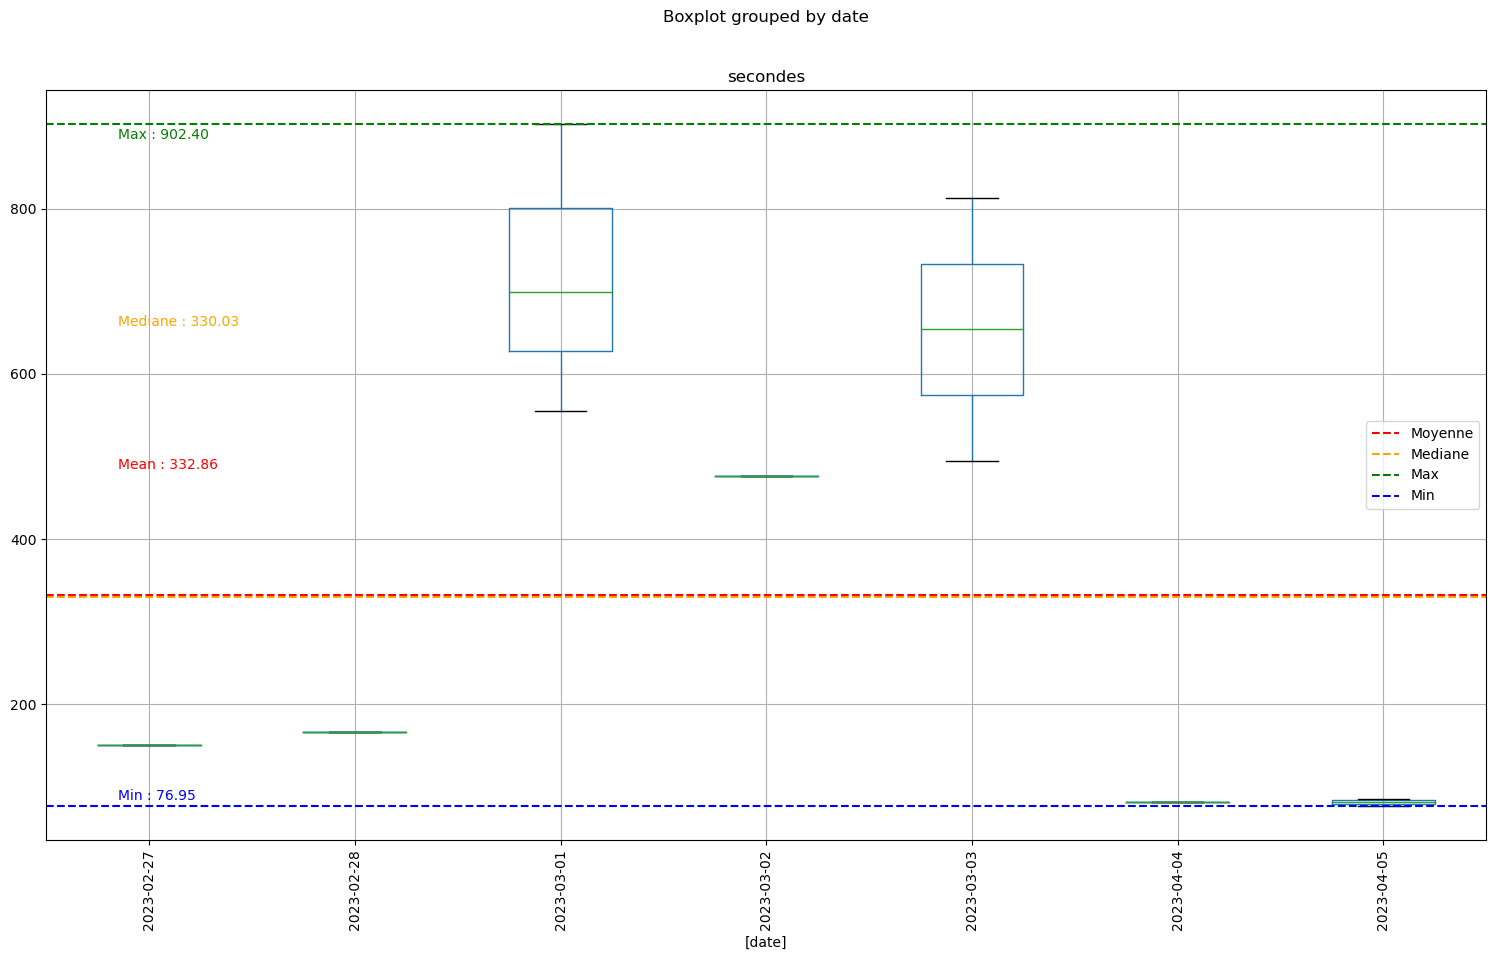

In [92]:
# Effectuer le box plot avec pandas
ax = odf.boxplot(column=['secondes'], by=['date'], figsize=(18,10))

# Calculer la moyenne des secondes pour chaque date
mean = odf.groupby('date')['secondes'].mean()
median = odf.groupby('date')['secondes'].median()
maxi = odf['secondes'].max()
mini = odf['secondes'].min()

# Ajouter une ligne rouge horizontale pour la moyenne des moyennes
ax.axhline(y=mean.mean(), color='red', linestyle='--', label='Moyenne')
ax.axhline(y=median.mean(), color='orange', linestyle='--', label='Mediane')
ax.axhline(y=maxi, color='green', linestyle='--', label='Max')
ax.axhline(y=mini, color='blue', linestyle='--', label='Min')

# Faire pivoter les étiquettes de l'axe des x
plt.xticks(rotation=90)

# Ajouter les valeurs du minimum et du maximum sur l'axe des y
# Ajouter les valeurs du minimum, maximum et moyenne sur l'axe des y
ax.text(0.05, 0.95, f"Max : {maxi:.2f}", transform=ax.transAxes, va='top', ha='left', color='green')
ax.text(0.05, 0.70, f"Mediane : {median.mean():.2f}", transform=ax.transAxes, va='top', ha='left', color='orange')
ax.text(0.05, 0.50, f"Mean : {mean.mean():.2f}", transform=ax.transAxes, va='center', ha='left', color='red')
ax.text(0.05, 0.05, f"Min : {mini:.2f}", transform=ax.transAxes, va='bottom', ha='left', color='blue')

# Ajouter une légende
ax.legend()

# Afficher le graphique
plt.show()

# Estimation de la tendance TSD



## Analyse moyenne journaliere du device SDK

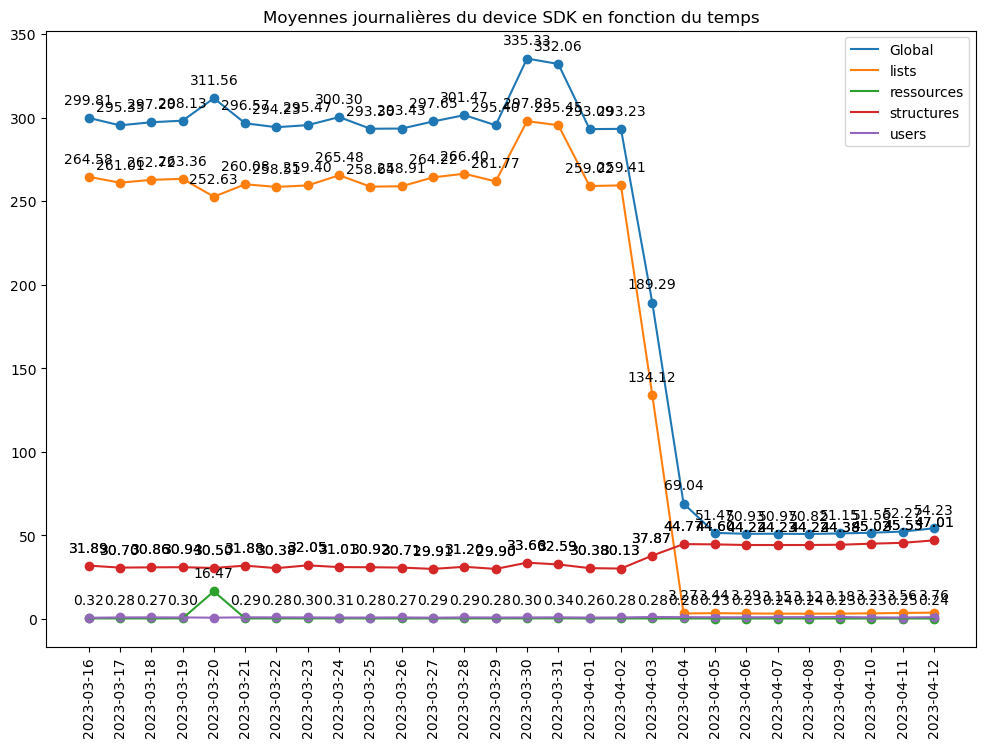

In [93]:
# Calculer la moyenne des secondes pour chaque date
mean = df.groupby('date')['secondes'].mean()

# Calculer la moyenne des secondes lists pour chaque date
mean_lists=df.groupby('date')['lists'].mean()

# Calculer la moyenne des secondes structures pour chaque date
mean_structures=df.groupby('date')['structures'].mean()

# Calculer la moyenne des secondes broadcast pour chaque date
mean_broadcast=df.groupby('date')['broadcast'].mean()

# Calculer la moyenne des secondes ressources pour chaque date
mean_ressources=df.groupby('date')['ressources'].mean()

# Calculer la moyenne des secondes users pour chaque date
mean_users=df.groupby('date')['users'].mean()

# Filtrer les données pour garder uniquement celles à partir du 16/03/2023
mean = mean.loc[mean.index >= '2023-03-16']
mean_structures = mean_structures.loc[mean_structures.index >= '2023-03-16']
mean_lists = mean_lists.loc[mean_lists.index >= '2023-03-16']
mean_broadcast = mean_broadcast.loc[mean_broadcast.index >= '2023-03-16']
mean_ressources = mean_ressources.loc[mean_ressources.index >= '2023-03-16']
mean_users = mean_users.loc[mean_users.index >= '2023-03-16']


fig, ax = plt.subplots(figsize=(12, 8))

# Ajouter une ligne de tendance à partir de la moyenne des secondes par date
plt.plot(mean.index, mean.values, label='Global')

# Tracer le graphique de la moyenne par jour des secondes lists en fonction du temps
plt.plot(mean_lists.index, mean_lists, label='lists' ) 

# Tracer le graphique de la moyenne par jour des ressources lists en fonction du temps
plt.plot(mean_ressources.index, mean_ressources, label='ressources' )

# Tracer le graphique de la moyenne par jour des structures lists en fonction du temps
plt.plot(mean_structures.index, mean_structures, label='structures' )

# Tracer le graphique de la moyenne par jour des ressources lists en fonction du temps
plt.plot(mean_users.index, mean_users, label='users' )

for x, y in zip(mean.index, mean.values):
    label = f"{y:.2f}"
    plt.annotate(label, (x, y), textcoords="offset points", xytext=(0,10), ha='center')

for x, y in zip(mean_lists.index, mean_lists):
    label = f"{y:.2f}"
    plt.annotate(label, (x, y), textcoords="offset points", xytext=(0,10), ha='center') 
    
for x, y in zip(mean_ressources.index, mean_ressources):
    label = f"{y:.2f}"
    plt.annotate(label, (x, y), textcoords="offset points", xytext=(0,10), ha='center') 
    
for x, y in zip(mean_structures.index, mean_structures):
    label = f"{y:.2f}"
    plt.annotate(label, (x, y), textcoords="offset points", xytext=(0,10), ha='center') 
    
#for x, y in zip(mean_users.index, mean_users):
    label = f"{y:.2f}"
    plt.annotate(label, (x, y), textcoords="offset points", xytext=(0,10), ha='center') 
    
# Afficher les points de la moyenne cumulée secondes lists à chaque date
plt.scatter(mean.index, mean)

# Afficher les points de la moyenne cumulée secondes lists à chaque date
plt.scatter(mean_lists.index, mean_lists)

# Afficher les points de la moyenne cumulée secondes lists à chaque date
plt.scatter(mean_ressources.index, mean_ressources)

# Afficher les points de la moyenne cumulée secondes lists à chaque date
plt.scatter(mean_structures.index, mean_structures)

# Afficher les points de la moyenne cumulée secondes lists à chaque date
plt.scatter(mean_users.index, mean_users)

# Ajouter une légende pour la ligne de tendance
plt.legend()
plt.title('Moyennes journalières du device SDK en fonction du temps')

# Faire pivoter les étiquettes de l'axe des x
plt.xticks(rotation=90)

# Afficher le graphique
plt.show()


# Supprimer les légendes du graphique
ax.legend().remove()

# Ouvrir la présentation PowerPoint existante
prs = Presentation('presentation.pptx')
slide_layout = prs.slide_layouts[5] # Layout pour un titre et un graphique
slide = prs.slides.add_slide(slide_layout)

# Ajouter le titre de la diapositive
title = slide.shapes.title
title.text = "TSD - Dimitri HAMON - DOTO"

fig.savefig('figure.png', dpi=400, bbox_inches='tight')

# Ajouter l'image du graphique à la diapositive
left = Inches(0.5)
top = Inches(1.5)
width = Inches(8)
height = Inches(5)
pic = slide.shapes.add_picture('figure.png', left, top, width, height)

import os
os.remove('figure.png')

# Sauvegarder la présentation modifiée
prs.save('presentation.pptx')


In [94]:
# Ouvrir la présentation PowerPoint
prs = Presentation('presentation.pptx')

# accédez à la deuxième slide
slide = prs.slides[1]

# Comparer les temps et calculer le gain en pourcentage du temps global de synchro depuis le début des tests
gain = (mean[0] - mean[-1]) / mean[0] * 100

# Ajout du texte à côté de l'image
text_box = slide.shapes.add_textbox(Inches(5), Inches(2), Inches(4), Inches(4))
text_frame = text_box.text_frame
text_frame.text = f"Temps global \nTemps t0 : {mean[0]:.6f} secondes\nTemps t : {mean[-1]:.6f} secondes\nGain en temps : {gain:.2f}%"

print(f"Temps t0 : {mean[0]:.6f} secondes")
print(f"Temps t : {mean[-1]:.6f} secondes") 
print(f"Gain en temps : {gain:.2f}%")

# Enregistrer votre présentation PowerPoint
prs.save('presentation.pptx')

Temps t0 : 299.814851 secondes
Temps t : 54.232895 secondes
Gain en temps : 81.91%


In [95]:
# Ouvrir la présentation PowerPoint
prs = Presentation('presentation.pptx')

# accédez à la deuxième slide
slide = prs.slides[1]

# Comparer les temps et calculer le gain en pourcentage du temps de l'item lists de synchro depuis le début des tests
gain = (mean_lists[0] - mean_lists[-1]) / mean_lists[0] * 100
# Ajout du texte à côté de l'image
text_box = slide.shapes.add_textbox(Inches(5), Inches(2), Inches(4), Inches(4))
text_frame = text_box.text_frame
text_frame.text = f"Temps item lists \nTemps t0 : {mean_lists[0]:.6f} secondes\nTemps t : {mean_lists[-1]:.6f} secondes\nGain en temps : {gain:.2f}%"

print(f"Temps t0 : {mean_lists[0]:.6f} secondes")
print(f"Temps t : {mean_lists[-1]:.6f} secondes") 
print(f"Gain en temps : {gain:.2f}%")

# Enregistrer votre présentation PowerPoint
prs.save('presentation.pptx')

Temps t0 : 264.580832 secondes
Temps t : 3.761490 secondes
Gain en temps : 98.58%


In [96]:
# Comparer les temps et calculer le gain en pourcentage du temps de l'item users de synchro depuis le début des tests
gain = (mean_users[0] - mean_users[-1]) / mean_users[0] * 100
print(f"Temps t0 : {mean_users[0]:.6f} secondes")
print(f"Temps t : {mean_users[-1]:.6f} secondes") 
print(f"Gain en temps : {gain:.2f}%")

Temps t0 : 0.671855 secondes
Temps t : 1.031689 secondes
Gain en temps : -53.56%


In [97]:
# Ouvrir la présentation PowerPoint
prs = Presentation('presentation.pptx')

# accédez à la deuxième slide
slide = prs.slides[1]

# Comparer les temps et calculer le gain en pourcentage du temps de l'item structures de synchro depuis le début des tests
gain = (mean_structures[0] - mean_structures[-1]) / mean_structures[0] * 100

# Ajout du texte à côté de l'image
text_box = slide.shapes.add_textbox(Inches(5), Inches(2), Inches(4), Inches(4))
text_frame = text_box.text_frame
text_frame.text = f"Temps item structures \nTemps t0 : {mean_structures[0]:.6f} secondes\nTemps t : {mean_structures[-1]:.6f} secondes\nGain en temps : {gain:.2f}%"


print(f"Temps t0 : {mean_structures[0]:.6f} secondes")
print(f"Temps t : {mean_structures[-1]:.6f} secondes") 
print(f"Gain en temps : {gain:.2f}%")

# Enregistrer votre présentation PowerPoint
prs.save('presentation.pptx')

Temps t0 : 31.885967 secondes
Temps t : 47.005719 secondes
Gain en temps : -47.42%


## Analyse de la moyenne cumulée des devices SDK

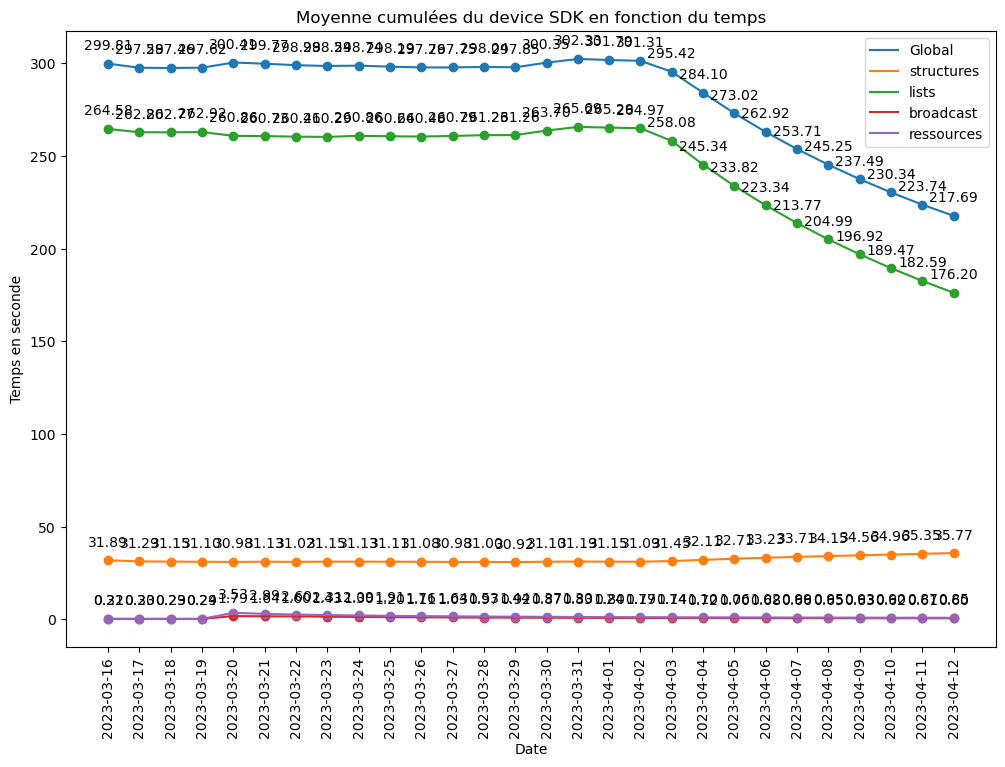

In [98]:
# Calculer la moyenne des secondes globales pour chaque date
mean = df.groupby('date')['secondes'].mean()

# Calculer la moyenne des secondes structures pour chaque date
mean_structures=df.groupby('date')['structures'].mean()

# Calculer la moyenne des secondes lists pour chaque date
mean_lists=df.groupby('date')['lists'].mean()

# Calculer la moyenne des secondes broadcast pour chaque date
mean_broadcast=df.groupby('date')['broadcast'].mean()

# Calculer la moyenne des secondes ressources pour chaque date
mean_ressources=df.groupby('date')['ressources'].mean()

# Filtrer les données pour garder uniquement celles à partir du 16/03/2023
mean = mean.loc[mean.index >= '2023-03-16']
mean_structures = mean_structures.loc[mean_structures.index >= '2023-03-16']
mean_lists = mean_lists.loc[mean_lists.index >= '2023-03-16']
mean_broadcast = mean_broadcast.loc[mean_broadcast.index >= '2023-03-16']
mean_ressources = mean_ressources.loc[mean_ressources.index >= '2023-03-16']

# Calculer la moyenne cumulée des secondes globales en fonction du temps
moyenne_cumulee = []
somme = 0
for i, valeur in enumerate(mean.values):
    somme += valeur
    moyenne_cumulee.append(somme / (i + 1))

# Calculer la moyenne cumulée des secondes structures en fonction du temps
moyenne_cumulee_structures = []
somme = 0
for i, valeur in enumerate(mean_structures.values):
    somme += valeur
    moyenne_cumulee_structures.append(somme / (i + 1))    

# Calculer la moyenne cumulée des secondes lists en fonction du temps
moyenne_cumulee_lists = []
somme = 0
for i, valeur in enumerate(mean_lists.values):
    somme += valeur
    moyenne_cumulee_lists.append(somme / (i + 1)) 

# Calculer la moyenne cumulée des secondes broadcast en fonction du temps
moyenne_cumulee_broadcast = []
somme = 0
for i, valeur in enumerate(mean_broadcast.values):
    somme += valeur
    moyenne_cumulee_broadcast.append(somme / (i + 1)) 

# Calculer la moyenne cumulée des secondes ressources en fonction du temps
moyenne_cumulee_ressources = []
somme = 0
for i, valeur in enumerate(mean_ressources.values):
    somme += valeur
    moyenne_cumulee_ressources.append(somme / (i + 1)) 

    
# Créer une figure de taille 12x8 pouces
fig, ax = plt.subplots(figsize=(12, 8))

for x, y in zip(mean.index, moyenne_cumulee):
    label = f"{y:.2f}"
    plt.annotate(label, (x, y), textcoords="offset points", xytext=(0,10), ha='center')

for x, y in zip(mean_structures.index, moyenne_cumulee_structures):
    label = f"{y:.2f}"
    plt.annotate(label, (x, y), textcoords="offset points", xytext=(0,10), ha='center')

for x, y in zip(mean_lists.index, moyenne_cumulee_lists):
    label = f"{y:.2f}"
    plt.annotate(label, (x, y), textcoords="offset points", xytext=(0,10), ha='center')

for x, y in zip(mean_broadcast.index, moyenne_cumulee_broadcast):
    label = f"{y:.2f}"
    plt.annotate(label, (x, y), textcoords="offset points", xytext=(0,10), ha='center')

for x, y in zip(mean_ressources.index, moyenne_cumulee_ressources):
    label = f"{y:.2f}"
    plt.annotate(label, (x, y), textcoords="offset points", xytext=(0,10), ha='center')
    
# Tracer le graphique de la moyenne cumulée des secondes globales en fonction du temps
plt.plot(mean.index, moyenne_cumulee, label = 'Global')
plt.xlabel('Date')
plt.ylabel('Moyenne cumulée globale des temps')
plt.title('Moyenne cumulées des devices SDK en fonction du temps')

# Tracer le graphique de la moyenne cumulée des secondes structures en fonction du temps
plt.plot(mean_structures.index, moyenne_cumulee_structures, label='structures')
plt.xlabel('Date')
plt.ylabel('Moyenne cumulée structures des temps')
plt.title('Moyenne cumulées des devices SDK en fonction du temps')

# Tracer le graphique de la moyenne cumulée des secondes lists en fonction du temps
plt.plot(mean_lists.index, moyenne_cumulee_lists, label='lists' ) 
plt.xlabel('Date')
plt.ylabel('Moyenne cumulée structures des temps')
plt.title('Moyenne cumulées des devices SDK en fonction du temps')

# Tracer le graphique de la moyenne cumulée des secondes broadcast en fonction du temps
plt.plot(mean_broadcast.index, moyenne_cumulee_broadcast, label='broadcast')
plt.xlabel('Date')
plt.ylabel('Moyenne cumulée structures des temps')
plt.title('Moyenne cumulées des devices SDK en fonction du temps')

# Tracer le graphique de la moyenne cumulée des secondes ressources en fonction du temps
plt.plot(mean_ressources.index, moyenne_cumulee_ressources, label = 'ressources')
plt.xlabel('Date')
plt.ylabel('Temps en seconde')
plt.title('Moyenne cumulées du device SDK en fonction du temps')

# Afficher les points de la moyenne cumulée secondes generales à chaque date
plt.scatter(mean.index, moyenne_cumulee)

# Afficher les points de la moyenne cumulée secondes structures à chaque date
plt.scatter(mean_structures.index, moyenne_cumulee_structures)

# Afficher les points de la moyenne cumulée secondes lists à chaque date
plt.scatter(mean_lists.index, moyenne_cumulee_lists)

# Afficher les points de la moyenne cumulée secondes broadcast à chaque date
plt.scatter(mean_broadcast.index, moyenne_cumulee_broadcast)

# Afficher les points de la moyenne cumulée secondes ressources à chaque date
plt.scatter(mean_ressources.index, moyenne_cumulee_ressources)

# Faire pivoter les étiquettes de l'axe des x
plt.xticks(rotation=90)

# Ajouter une légende
plt.legend()

# Afficher le graphique
plt.show()

# Ouvrir la présentation PowerPoint existante
prs = Presentation('presentation.pptx')
slide_layout = prs.slide_layouts[5] # Layout pour un titre et un graphique
slide = prs.slides.add_slide(slide_layout)

# Ajouter le titre de la diapositive
title = slide.shapes.title
title.text = "TSD - Dimitri HAMON - DOTO"

fig.savefig('figure1.png', dpi=400, bbox_inches='tight')

# Ajouter l'image du graphique à la diapositive
left = Inches(0.5)
top = Inches(1.5)
width = Inches(8)
height = Inches(5)
pic = slide.shapes.add_picture('figure1.png', left, top, width, height)

import os
os.remove('figure1.png')

# Sauvegarder la présentation modifiée
prs.save('presentation.pptx')

In [106]:
# Ouvrir la présentation PowerPoint
prs = Presentation('presentation.pptx')

# accédez à la deuxième slide
slide = prs.slides[2]


# Comparer les temps et calculer le gain en pourcentage du temps global de synchro depuis le début des tests
gain = (moyenne_cumulee[0] - moyenne_cumulee[-1]) / moyenne_cumulee[0] * 100
print(f"Temps standard : {moyenne_cumulee[0]:.6f} secondes")
print(f"Temps cumulatif : {moyenne_cumulee[-1]:.6f} secondes") 
print(f"Gain en temps : {gain:.2f}%")

# Ajout du texte à côté de l'image
text_box = slide.shapes.add_textbox(Inches(5), Inches(2), Inches(4), Inches(4))
text_frame = text_box.text_frame
text_frame.text = f"Temps standard : {moyenne_cumulee[0]:.6f} secondes\nTemps cumulatif : {moyenne_cumulee[-1]:.6f} secondes\nGain en temps : {gain:.2f}%"

# Enregistrer votre présentation PowerPoint
prs.save('presentation.pptx')

Temps standard : 150.089193 secondes
Temps cumulatif : 332.860631 secondes
Gain en temps : -121.78%


## Analyse moyenne journaliere des OtherDevices

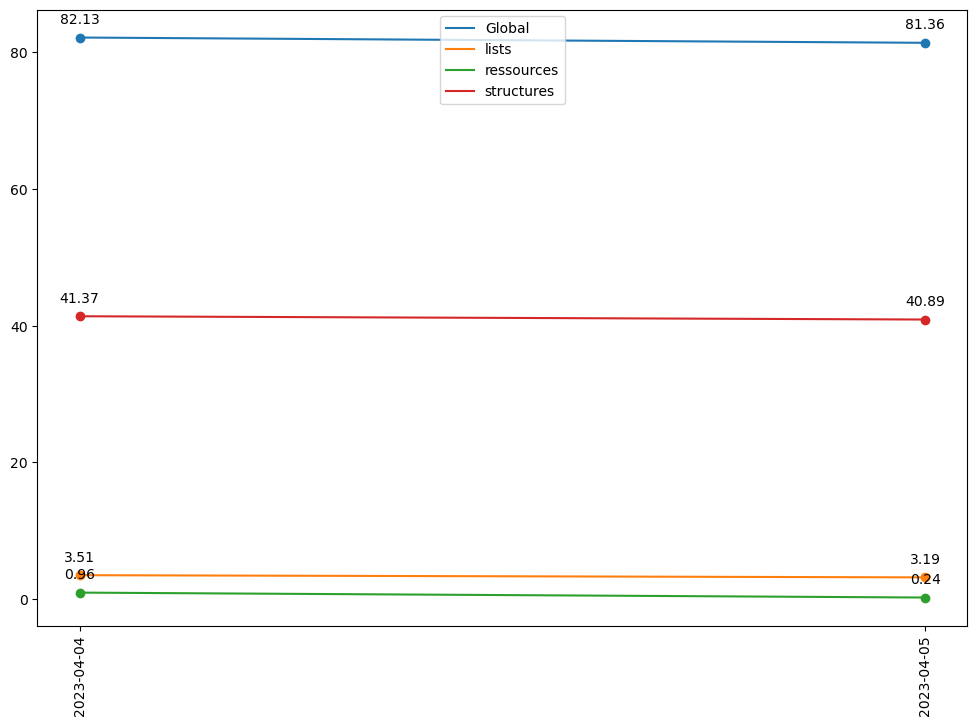

In [100]:
# Calculer la moyenne des secondes pour chaque date
mean = odf.groupby('date')['secondes'].mean()

# Calculer la moyenne des secondes lists pour chaque date
mean_lists=odf.groupby('date')['lists'].mean()

# Calculer la moyenne des secondes structures pour chaque date
mean_structures=odf.groupby('date')['structures'].mean()

# Calculer la moyenne des secondes broadcast pour chaque date
mean_broadcast=odf.groupby('date')['broadcast'].mean()

# Calculer la moyenne des secondes ressources ur chaqpoue date
mean_ressources=odf.groupby('date')['ressources'].mean()

# Filtrer les données pour garder uniquement celles à partir du 16/03/2023
mean = mean.loc[mean.index >= '2023-03-16']
mean_structures = mean_structures.loc[mean_structures.index >= '2023-03-16']
mean_lists = mean_lists.loc[mean_lists.index >= '2023-03-16']
mean_broadcast = mean_broadcast.loc[mean_broadcast.index >= '2023-03-16']
mean_ressources = mean_ressources.loc[mean_ressources.index >= '2023-03-16']

# Ajouter une ligne de tendance à partir de la moyenne des secondes par date
plt.figure(figsize=(12, 8))
plt.plot(mean.index, mean.values, label='Global')

# Tracer le graphique de la moyenne par jour des secondes lists en fonction du temps
plt.plot(mean_lists.index, mean_lists, label='lists' ) 

# Tracer le graphique de la moyenne par jour des ressources lists en fonction du temps
plt.plot(mean_ressources.index, mean_ressources, label='ressources' )

# Tracer le graphique de la moyenne par jour des ressources lists en fonction du temps
plt.plot(mean_structures.index, mean_structures, label='structures' )


for x, y in zip(mean.index, mean.values):
    label = f"{y:.2f}"
    plt.annotate(label, (x, y), textcoords="offset points", xytext=(0,10), ha='center')

for x, y in zip(mean_lists.index, mean_lists):
    label = f"{y:.2f}"
    plt.annotate(label, (x, y), textcoords="offset points", xytext=(0,10), ha='center') 
    
for x, y in zip(mean_ressources.index, mean_ressources):
    label = f"{y:.2f}"
    plt.annotate(label, (x, y), textcoords="offset points", xytext=(0,10), ha='center') 
    
for x, y in zip(mean_structures.index, mean_structures):
    label = f"{y:.2f}"
    plt.annotate(label, (x, y), textcoords="offset points", xytext=(0,10), ha='center') 
    
# Afficher les points de la moyenne cumulée secondes lists à chaque date
plt.scatter(mean.index, mean)

# Afficher les points de la moyenne cumulée secondes lists à chaque date
plt.scatter(mean_lists.index, mean_lists)

# Afficher les points de la moyenne cumulée secondes lists à chaque date
plt.scatter(mean_ressources.index, mean_ressources)

# Afficher les points de la moyenne cumulée secondes lists à chaque date
plt.scatter(mean_structures.index, mean_structures)
    
# Ajouter une légende pour la ligne de tendance
plt.legend()

# Faire pivoter les étiquettes de l'axe des x
plt.xticks(rotation=90)

# Afficher le graphique
plt.show()

## Analyse de la moyenne cumulée des OtherDevices

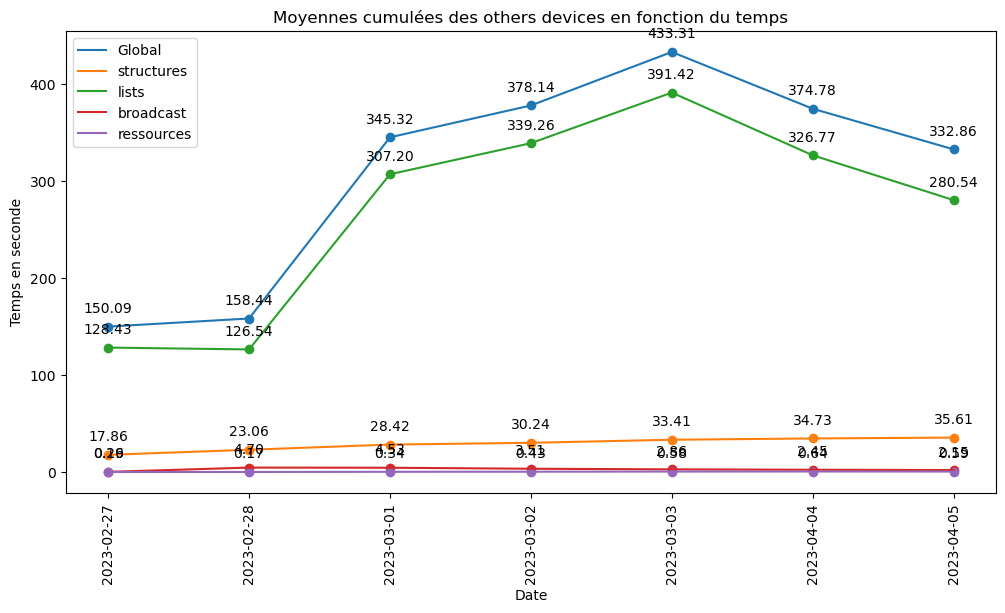

In [101]:
# Calculer la moyenne des secondes globales pour chaque date
mean = odf.groupby('date')['secondes'].mean()

# Calculer la moyenne des secondes structures pour chaque date
mean_structures=odf.groupby('date')['structures'].mean()

# Calculer la moyenne des secondes lists pour chaque date
mean_lists=odf.groupby('date')['lists'].mean()

# Calculer la moyenne des secondes broadcast pour chaque date
mean_broadcast=odf.groupby('date')['broadcast'].mean()

# Calculer la moyenne des secondes ressources pour chaque date
mean_ressources=odf.groupby('date')['ressources'].mean()

# Filtrer les données pour garder uniquement celles à partir du 08/03/2023
mean = mean.loc[mean.index >= '2023-02-22']
mean_structures = mean_structures.loc[mean.index >= '2023-02-22']
mean_lists = mean_lists.loc[mean.index >= '2023-02-22']
mean_broadcast = mean_broadcast.loc[mean.index >= '2023-02-22']
mean_ressources = mean_ressources.loc[mean.index >= '2023-02-22']

# Calculer la moyenne cumulée des secondes globales en fonction du temps
moyenne_cumulee = []
somme = 0
for i, valeur in enumerate(mean.values):
    somme += valeur
    moyenne_cumulee.append(somme / (i + 1))

# Calculer la moyenne cumulée des secondes structures en fonction du temps
moyenne_cumulee_structures = []
somme = 0
for i, valeur in enumerate(mean_structures.values):
    somme += valeur
    moyenne_cumulee_structures.append(somme / (i + 1))    

# Calculer la moyenne cumulée des secondes lists en fonction du temps
moyenne_cumulee_lists = []
somme = 0
for i, valeur in enumerate(mean_lists.values):
    somme += valeur
    moyenne_cumulee_lists.append(somme / (i + 1)) 

# Calculer la moyenne cumulée des secondes broadcast en fonction du temps
moyenne_cumulee_broadcast = []
somme = 0
for i, valeur in enumerate(mean_broadcast.values):
    somme += valeur
    moyenne_cumulee_broadcast.append(somme / (i + 1)) 

# Calculer la moyenne cumulée des secondes ressources en fonction du temps
moyenne_cumulee_ressources = []
somme = 0
for i, valeur in enumerate(mean_ressources.values):
    somme += valeur
    moyenne_cumulee_ressources.append(somme / (i + 1)) 

    
# Créer une figure de taille 12x6 pouces
plt.figure(figsize=(12, 6))

for x, y in zip(mean.index, moyenne_cumulee):
    label = f"{y:.2f}"
    plt.annotate(label, (x, y), textcoords="offset points", xytext=(0,10), ha='center')

for x, y in zip(mean_structures.index, moyenne_cumulee_structures):
    label = f"{y:.2f}"
    plt.annotate(label, (x, y), textcoords="offset points", xytext=(0,10), ha='center')

for x, y in zip(mean_lists.index, moyenne_cumulee_lists):
    label = f"{y:.2f}"
    plt.annotate(label, (x, y), textcoords="offset points", xytext=(0,10), ha='center')

for x, y in zip(mean_broadcast.index, moyenne_cumulee_broadcast):
    label = f"{y:.2f}"
    plt.annotate(label, (x, y), textcoords="offset points", xytext=(0,10), ha='center')

for x, y in zip(mean_ressources.index, moyenne_cumulee_ressources):
    label = f"{y:.2f}"
    plt.annotate(label, (x, y), textcoords="offset points", xytext=(0,10), ha='center')
    
# Tracer le graphique de la moyenne cumulée des secondes globales en fonction du temps
plt.plot(mean.index, moyenne_cumulee, label = 'Global')
plt.xlabel('Date')
plt.ylabel('Moyenne cumulée globale des temps')
plt.title('Moyenne cumulées des devices SDK en fonction du temps')

# Tracer le graphique de la moyenne cumulée des secondes structures en fonction du temps
plt.plot(mean_structures.index, moyenne_cumulee_structures, label='structures')
plt.xlabel('Date')
plt.ylabel('Moyenne cumulée structures des temps')
plt.title('Moyenne cumulées des devices SDK en fonction du temps')

# Tracer le graphique de la moyenne cumulée des secondes lists en fonction du temps
plt.plot(mean_lists.index, moyenne_cumulee_lists, label='lists' ) 
plt.xlabel('Date')
plt.ylabel('Moyenne cumulée structures des temps')
plt.title('Moyenne cumulées des devices SDK en fonction du temps')

# Tracer le graphique de la moyenne cumulée des secondes broadcast en fonction du temps
plt.plot(mean_broadcast.index, moyenne_cumulee_broadcast, label='broadcast')
plt.xlabel('Date')
plt.ylabel('Moyenne cumulée structures des temps')
plt.title('Moyenne cumulées des devices SDK en fonction du temps')

# Tracer le graphique de la moyenne cumulée des secondes ressources en fonction du temps
plt.plot(mean_ressources.index, moyenne_cumulee_ressources, label = 'ressources')
plt.xlabel('Date')
plt.ylabel('Temps en seconde')
plt.title('Moyennes cumulées des others devices en fonction du temps')

# Afficher les points de la moyenne cumulée secondes generales à chaque date
plt.scatter(mean.index, moyenne_cumulee)

# Afficher les points de la moyenne cumulée secondes structures à chaque date
plt.scatter(mean_structures.index, moyenne_cumulee_structures)

# Afficher les points de la moyenne cumulée secondes lists à chaque date
plt.scatter(mean_lists.index, moyenne_cumulee_lists)

# Afficher les points de la moyenne cumulée secondes broadcast à chaque date
plt.scatter(mean_broadcast.index, moyenne_cumulee_broadcast)

# Afficher les points de la moyenne cumulée secondes ressources à chaque date
plt.scatter(mean_ressources.index, moyenne_cumulee_ressources)

# Faire pivoter les étiquettes de l'axe des x
plt.xticks(rotation=90)

# Ajouter une légende
plt.legend()

# Afficher le graphique
plt.show()

In [102]:
# Comparer les temps et calculer le gain en pourcentage du temps global de synchro depuis le début des tests
gain = (moyenne_cumulee[0] - moyenne_cumulee[-1]) / moyenne_cumulee[0] * 100
print(f"Temps standard : {moyenne_cumulee[0]:.6f} secondes")
print(f"Temps cumulatif : {moyenne_cumulee[-1]:.6f} secondes") 
print(f"Gain en temps : {gain:.2f}%")

Temps standard : 150.089193 secondes
Temps cumulatif : 332.860631 secondes
Gain en temps : -121.78%
